**Nama:** Andi Pangestu  
**Asal Universitas:** Universitas Ngudi Waluyo  
**NIM:** 144212017

MUK - Associate Data Science 2
Anda baru saja mendapatkan kontrak kerja dengan perusahaan E-commerce yang berbasis di New York yang menjual pakaian secara online. Mereka juga memiliki sesi/pertemuan yang memberikan saran gaya dan pakaian di toko mereka. Pelanggan datang ke toko, mengadakan sesi dengan personal stylist, kemudian mereka dapat pulang dan memesan baik di aplikasi seluler atau situs web untuk pakaian yang mereka inginkan.

Perusahaan sedang mencoba memutuskan apakah akan memfokuskan upaya mereka pada pengalaman aplikasi seluler atau situs web mereka. Mereka telah mempekerjakan Anda dalam kontrak untuk membantu mereka mengetahuinya!

# prediksi pengeluaran tahunan berdasarkan penggunaan aplikasi dan situs web

### Prediksi ini digunakan untuk memprediksi prediksi pengeluaran tahunan pelanggan (yearly amount spent )
### berdasarkan :
-  durasi waktu rata-rata(Avg. Session Length)
-  waktu yang digabiskan di aplikasi (Time on app)
-  waktu yang dihabiskan di website (time on web)
-  lama menjadi anggota(Length of membership)

In [ ]:
# Melakukan load datastes dan menampilkanya dalam bentuk dataframe
import pandas as pd

df = pd.read_csv("Ecommerce_Customers.csv")
print(df.head(10))

print("datasets info Ecommerce Customers datasets")
print(df.info())

print("melihat jumlah missing value pada datasets Ecommerce Customers")
print(df.isnull().sum())

print("datasets discribe Ecommerce Customers datasets sebelum scaling")
print(df.describe())

print("datasets discribe Ecommerce Customers datasets sebelum scaling")
print(df.describe())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   
5         alvareznancy@lucas.biz   
6          katherine20@yahoo.com   
7             awatkins@yahoo.com   
8    vchurch@walter-martinez.com   
9               bonnie69@lin.biz   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5  645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6  68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7          

In [2]:
print("datasets info Ecommerce Customers datasets")
print(df.info())

datasets info Ecommerce Customers datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


In [3]:
print("melihat jumlah missing value pada datasets Ecommerce Customers")
print(df.isnull().sum())

melihat jumlah missing value pada datasets Ecommerce Customers
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [4]:
print("datasets discribe Ecommerce Customers datasets sebelum scaling")
print(df.describe())

datasets discribe Ecommerce Customers datasets sebelum scaling
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           5

In [5]:
# Memilih kolom yang relevan untuk analisis
selected_columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
datasets = df[selected_columns]
print(datasets.head(10))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   
5            33.871038    12.026925        34.476878              5.493507   
6            32.021596    11.366348        36.683776              4.685017   
7            32.739143    12.351959        37.373359              4.434273   
8            33.987773    13.386235        37.534497              3.273434   
9            31.936549    11.814128        37.145168              3.202806   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.

In [6]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Melakukan scaling pada semua kolom numerik
numeric_columns = datasets.select_dtypes(include=['float64', 'int64']).columns  # Memilih kolom numerik
datasets[numeric_columns] = scaler.fit_transform(datasets[numeric_columns])

# Menampilkan hasil setelah scaling
print(datasets)


     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               1.456351     0.607280         2.493589              0.550107   
1              -1.136502    -0.949464         0.206556             -0.870927   
2              -0.052723    -0.727139         0.049681              0.572067   
3               1.263010     1.676390        -0.335978             -0.413996   
4               0.279838     0.747770         0.471737              0.914422   
..                   ...          ...              ...                   ...   
495             0.186035     1.524003        -0.636429              0.213479   
496             1.663357    -0.359187         0.128603              0.043139   
497            -0.409872    -0.556854         1.260187              1.427261   
498             0.271597     0.341248        -0.218291             -1.199042   
499             0.668422     0.368821        -1.277323             -0.799679   

     Yearly Amount Spent  
0           

C:\Users\HP\AppData\Local\Temp\ipykernel_27736\2164745667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets[numeric_columns] = scaler.fit_transform(datasets[numeric_columns])


### mendeteksi outlayer 
### Titik yang berada di luar "whiskers" (garis vertikal) menunjukkan adanya outliers

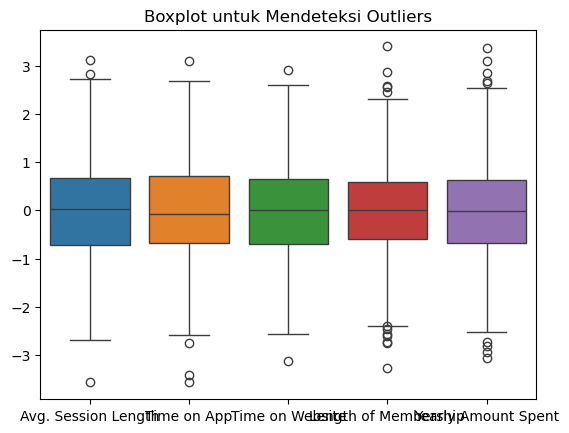

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan boxplot untuk kolom numerik
sns.boxplot(data=datasets[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.show()

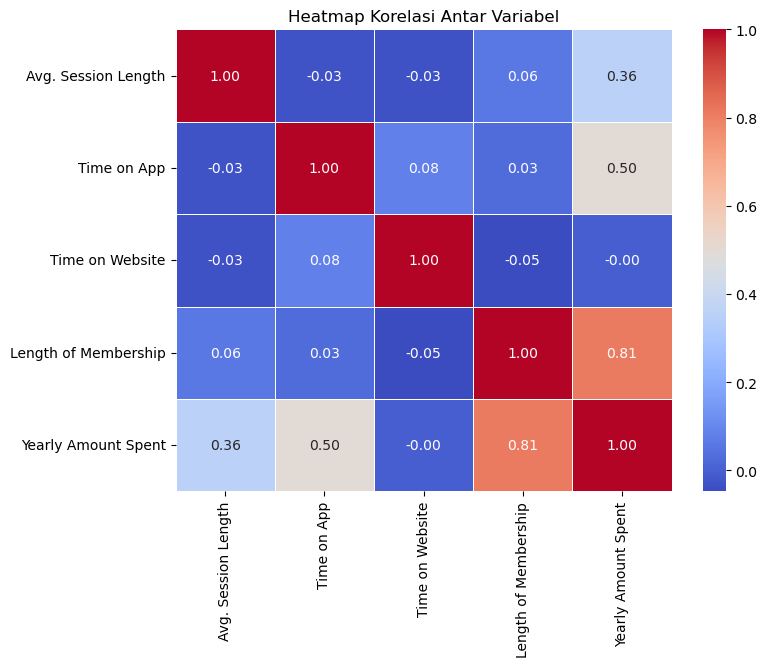

In [8]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = datasets[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


## Berdasarkan heatmap, hubungan antar variabel dapat dijelaskan sebagai berikut:

1. Hubungan terkuat:
Length of Membership dengan Yearly Amount Spent. Semakin lama menjadi anggota, semakin banyak uang yang dihabiskan.
2. Hubungan sedang:
Time on App dengan Yearly Amount Spent. Semakin lama di aplikasi, semakin banyak uang yang cenderung dihabiskan.
3. Hubungan lemah atau tidak ada:
Time on Website dengan Yearly Amount Spent. Tidak ada korelasi signifikan antara waktu di website dan jumlah uang yang dibelanjakan.

### Visualisasi distribusi kolom numerik

memvisualisasikan distribusi kolom numerik


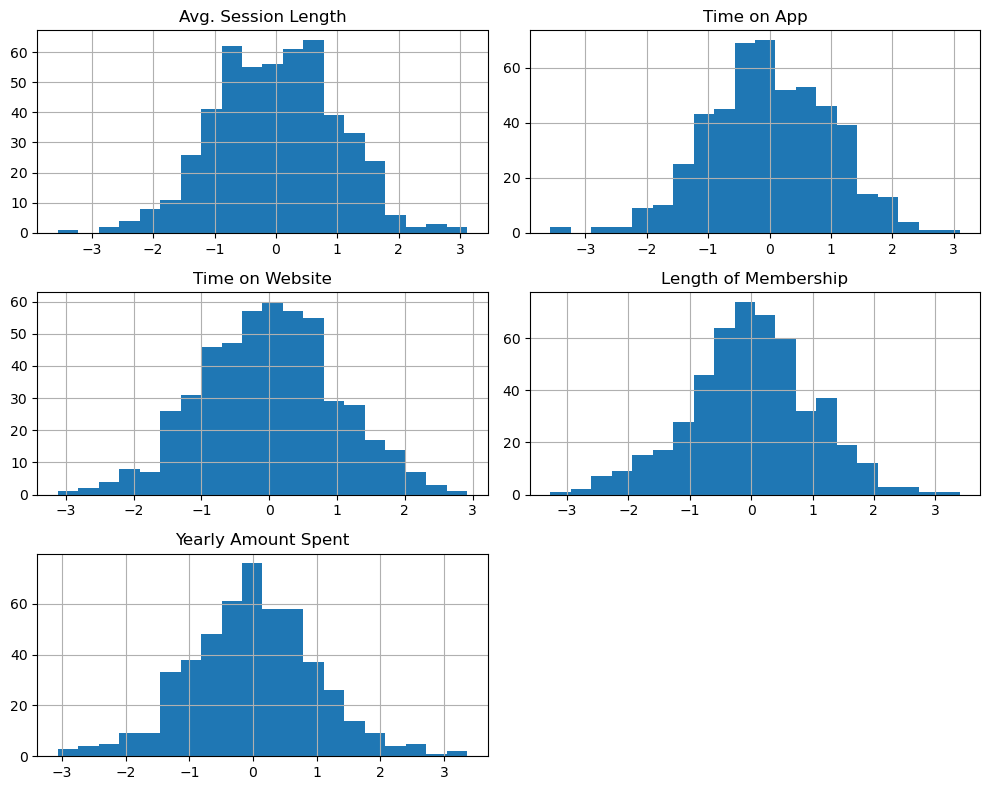

In [9]:

print("memvisualisasikan distribusi kolom numerik")

datasets.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Visualisasi data perbandingan waktu yang dihabiskan di aplikasi (Time on app) dan pengeluaran tahunan pelanggan (yearly amount spent )

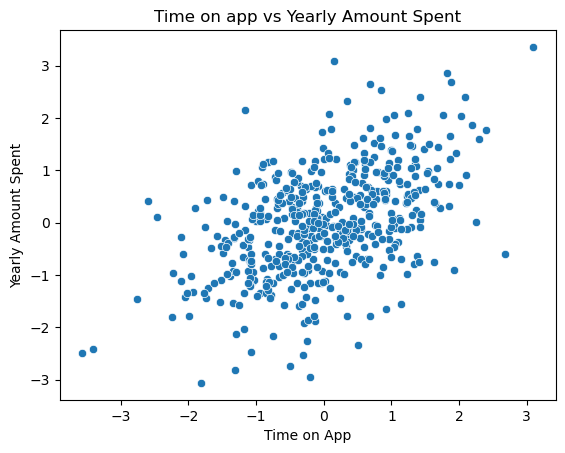

In [10]:
# Visualisasi data perbandingan Time on App dan yearly Aount spent

plt.Figure(figsize=(8,6))
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=datasets)
plt.title("Time on app vs Yearly Amount Spent")
plt.show()

### Visualisasi data perbandingan waktu yang dihabiskan di website (time on web) dan pengeluaran tahunan pelanggan (yearly amount spent )

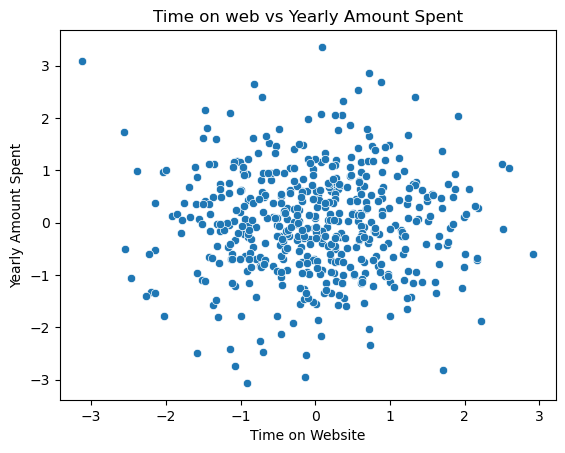

In [11]:
# Visualisasi data perbandingan Time on App dan yearly Aount spent

plt.Figure(figsize=(8,6))
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=datasets)
plt.title("Time on web vs Yearly Amount Spent")
plt.show()

### Visualisasi data perbandingan lama menjadi anggota(Length of membership) dan pengeluaran tahunan pelanggan (yearly amount spent )

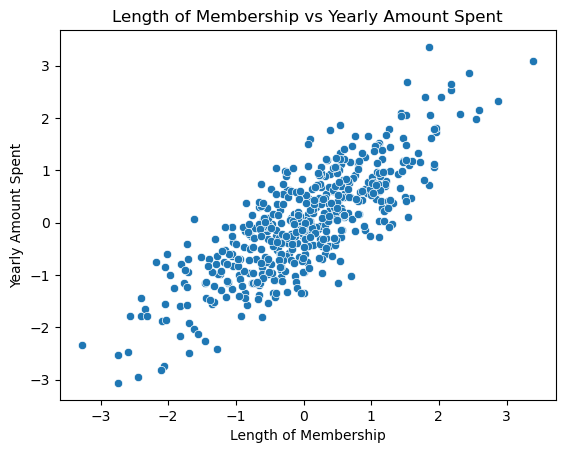

In [12]:
# Visualisasi data perbandingan Length of Membership dan yearly Aount spent

plt.Figure(figsize=(8,6))
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=datasets)
plt.title("Length of Membership vs Yearly Amount Spent")
plt.show()

### Melakukan spliting datasets antara kolom dependen variabel (X) dan kolom independen variabel (y)

In [13]:
from sklearn.model_selection import train_test_split

# membagi colom dependen variabel dan kolom independent variabel
X = datasets[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
y = datasets['Yearly Amount Spent']
print(X)
print(y)

# Spliting datasets 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0               1.456351     0.607280         2.493589              0.550107
1              -1.136502    -0.949464         0.206556             -0.870927
2              -0.052723    -0.727139         0.049681              0.572067
3               1.263010     1.676390        -0.335978             -0.413996
4               0.279838     0.747770         0.471737              0.914422
..                   ...          ...              ...                   ...
495             0.186035     1.524003        -0.636429              0.213479
496             1.663357    -0.359187         0.128603              0.043139
497            -0.409872    -0.556854         1.260187              1.427261
498             0.271597     0.341248        -0.218291             -1.199042
499             0.668422     0.368821        -1.277323             -0.799679

[500 rows x 4 columns]
0      1.118654
1     -1.351783
2     -0.148501
3   

### Melakukan Pelatihan model menggunakan Model linier regression dan melakukan evaluasi model menggunakan R2 score

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# melatih model menggunakan linier regression
linier_model = LinearRegression()
linier_model.fit(X_train, y_train)

# memprediksi menggunakan LinearRegression
y_pred_lr = linier_model.predict(X_test)

# menghitung R2 score
r2 = r2_score(y_test, y_pred_lr)

# menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)

# menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# menampilkan hasil analisis akurasi
print("R2 Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Analisis tambahan
if r2 > 0.8:
    print("Model memberikan prediksi yang sangat baik (R² > 0.8).")
elif r2 > 0.5:
    print("Model memberikan prediksi yang cukup baik (R² antara 0.5 dan 0.8).")
else:
    print("Model memberikan prediksi yang kurang baik (R² < 0.5).")

if mae < 1000:
    print("Kesalahan rata-rata (MAE) cukup kecil.")
else:
    print("Kesalahan rata-rata (MAE) cukup besar, model perlu perbaikan.")

if rmse < 1000:
    print("Root Mean Squared Error (RMSE) cukup rendah.")
else:
    print("Root Mean Squared Error (RMSE) tinggi, model bisa lebih dioptimalkan.")


R2 Score: 0.9861924261981548
Mean Absolute Error (MAE): 0.09649313547661617
Mean Squared Error (MSE): 0.01479553380186839
Root Mean Squared Error (RMSE): 0.1216368932596866
Model memberikan prediksi yang sangat baik (R² > 0.8).
Kesalahan rata-rata (MAE) cukup kecil.
Root Mean Squared Error (RMSE) cukup rendah.


### Melakukan Pelatihan model menggunakan Model Random forest regressor dan melakukan evaluasi model menggunakan R2 score

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model =  RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print("r2 score", r2_score(y_test, y_pred_rf))

r2 score 0.9173581282151937


### visualisasi prediksi vs aktual Lr model

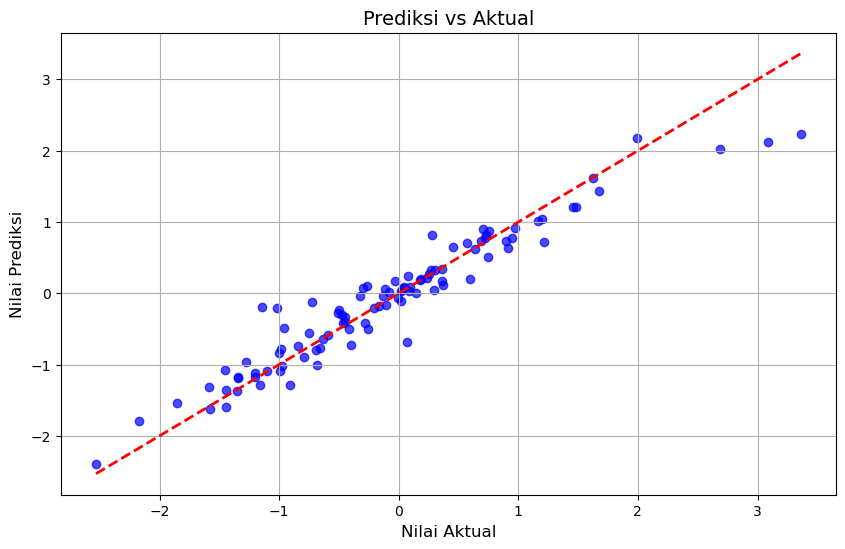

In [16]:
# a) Scatter Plot: Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Prediksi vs Aktual", fontsize=14)
plt.xlabel("Nilai Aktual", fontsize=12)
plt.ylabel("Nilai Prediksi", fontsize=12)
plt.grid(True)
plt.show()

### visualisasi prediksi vs aktual rf model

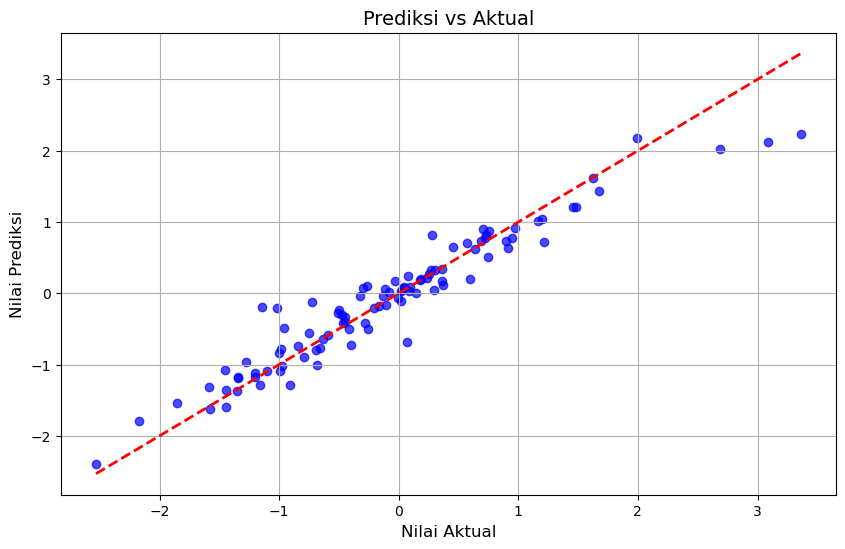

In [17]:
# a) Scatter Plot: Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Prediksi vs Aktual", fontsize=14)
plt.xlabel("Nilai Aktual", fontsize=12)
plt.ylabel("Nilai Prediksi", fontsize=12)
plt.grid(True)
plt.show()

### Visualisasi distribusi error

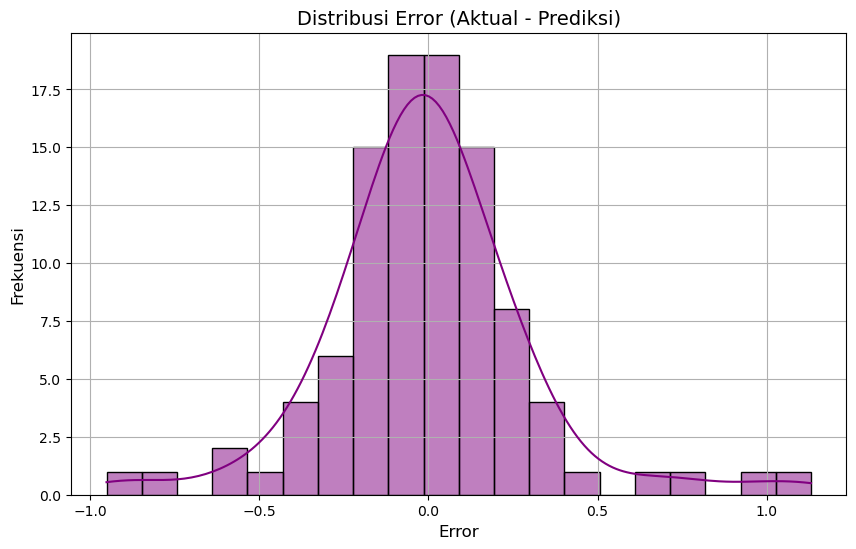

In [18]:
# b) Distribusi Error
error = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(error, bins=20, kde=True, color='purple')
plt.title("Distribusi Error (Aktual - Prediksi)", fontsize=14)
plt.xlabel("Error", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.grid(True)
plt.show()

In [19]:
New_data = pd.DataFrame({
    'Avg. Session Length' : [31.5],
    'Time on App' : [120.3],
    'Time on Website' : [56.4],
    'Length of Membership' : [4.5]
    })

prediksi_baru = linier_model.predict(New_data)
print('prediksi pengeluaran tahunan untuk data baru adalah :', prediksi_baru[0])

prediksi pengeluaran tahunan untuk data baru adalah : 72.66224778253775
